Clustering with selected genes

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import time
import os
import pickle

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
matfile = '/Users/bogao/DataFiles/new landscape/data/selected_gene_mat.pkl'
labelfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_label.pkl'
with open(matfile, 'rb') as fmat, open(labelfile, 'rb') as flab:
    data = pickle.load(fmat)
    labels = pickle.load(flab)

In [15]:
data = np.array(data)

In [4]:
data = preprocessing.MinMaxScaler().fit_transform(np.abs(data))

PCA

In [5]:
time_start = time.time()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

PCA done! Time elapsed: 2.649472951889038 seconds
Variance explained per principal component: [0.20899615 0.05108527]


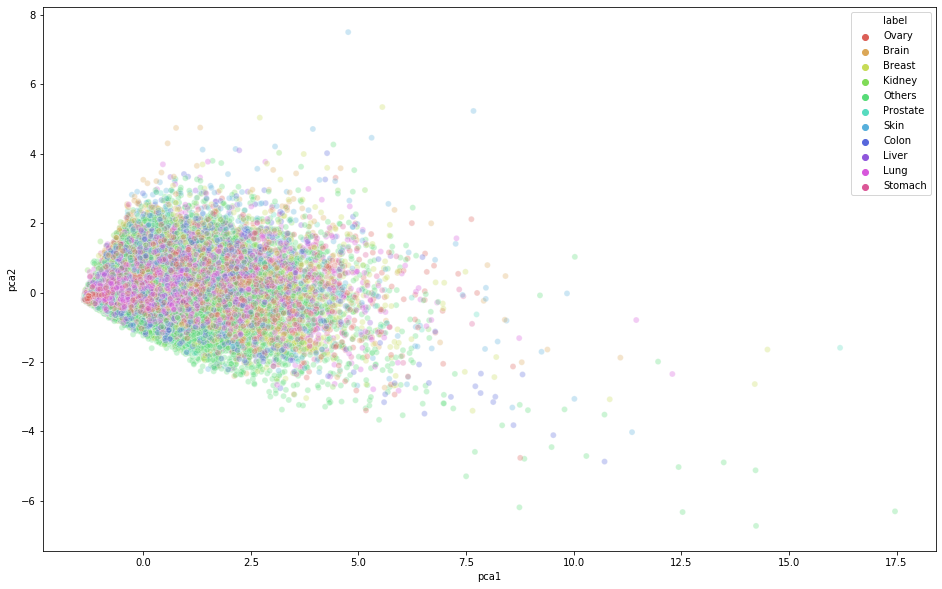

In [6]:
pca_df = pd.DataFrame(pca_result, columns = ['pca1','pca2'])
pca_df['label'] = labels

plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="pca1", y="pca2",
    hue="label",
    palette=sns.color_palette("hls", np.unique(labels).shape[0]),
    data=pca_df,
    legend="full",
    alpha=0.3
)

TSNE

In [16]:
dd = data[labels != 'Others']

In [17]:
RS = 1234

# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dd)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 2.386629104614258 seconds
Cumulative explained variation for 50 principal components: 0.8435492369739525


In [18]:
# TSNE
time_start = time.time()
dd_tsne = TSNE(random_state=RS, perplexity=40).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 336.63594102859497 seconds


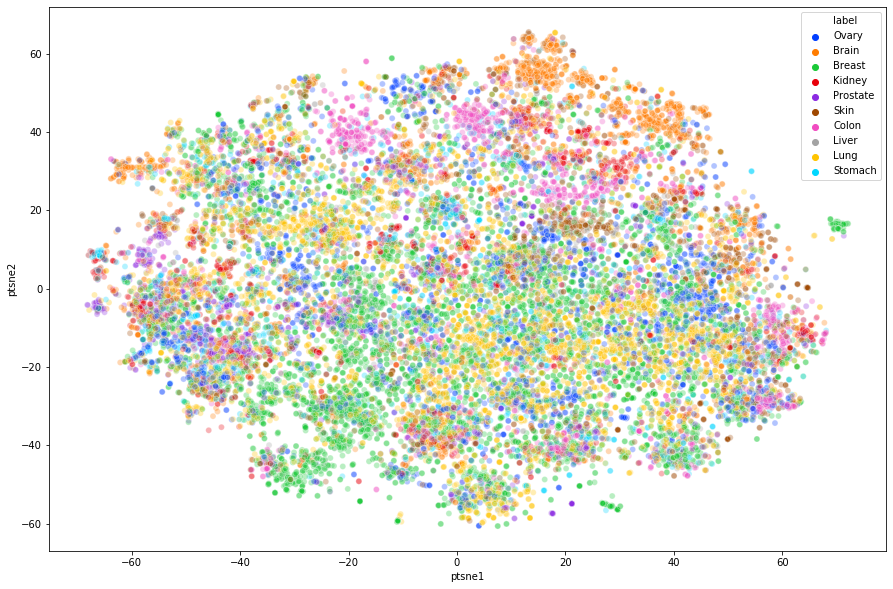

In [12]:
# plot
df = pd.DataFrame(dd_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = labels[labels != 'Others']
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(labels))-1),
    data=df,
    legend="full",
    alpha=0.3
)

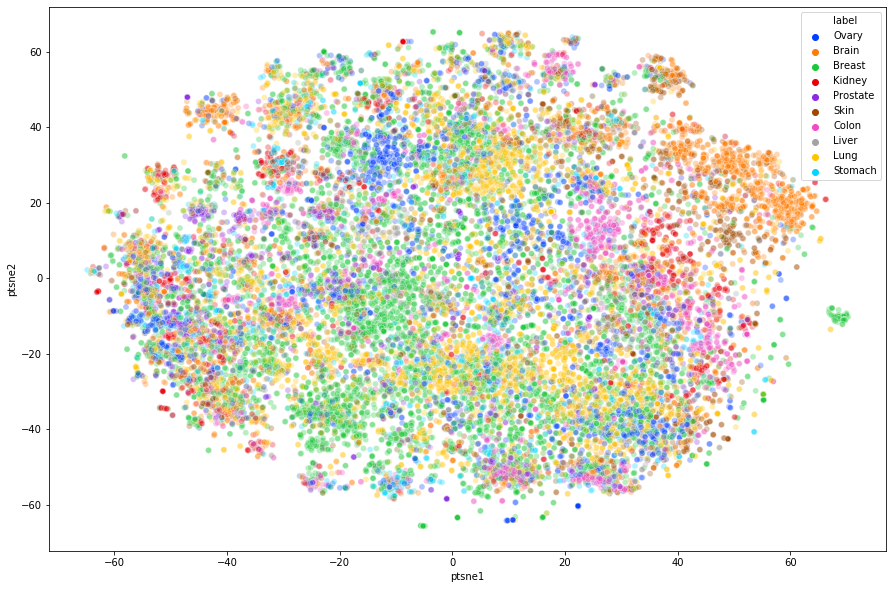

In [19]:
# plot
df = pd.DataFrame(dd_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = labels[labels != 'Others']
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(labels))-1),
    data=df,
    legend="full",
    alpha=0.3
)